In [75]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
from sklearn.svm import SVR

In [48]:
ds=pd.read_csv('LoL Data.csv')

In [49]:
ds.isnull().sum()

Team                     0
Player                   0
Opponent                 0
Position                 0
Champion                 0
Kills                    0
Deaths                   0
Assists                  0
Creep Score              0
Gold Earned              0
Champion Damage Share    0
Kill Participation       0
Wards Placed             0
Wards Destroyed          0
Ward Interactions        0
Dragons For              0
Dragons Against          0
Barons For               0
Barons Against           0
Result                   0
dtype: int64

In [50]:
ds.head()

,Team,Player,Opponent,Position,Champion,Kills,Deaths,Assists,Creep Score,Gold Earned,Champion Damage Share,Kill Participation,Wards Placed,Wards Destroyed,Ward Interactions,Dragons For,Dragons Against,Barons For,Barons Against,Result
0,UOL,Boss,GS,Top,Camille,4,5,3,188,11107,0.17,0.78,8,8,16,0,4,0,1,L
1,GS,Crazy,UOL,Top,Gwen,3,1,9,217,12201,0.20,0.52,10,7,17,4,0,1,0,W
2,UOL,Ahahacik,GS,Jungle,Trundle,2,4,5,156,9048,0.15,0.78,8,14,22,0,4,0,1,L
3,GS,Mojito,UOL,Jungle,Talon,5,4,10,194,11234,0.23,0.65,12,8,20,4,0,1,0,W
4,UOL,Nomanz,GS,Mid,Leblanc,1,3,4,216,9245,0.29,0.56,6,9,15,0,4,0,1,L


In [51]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Team                   215 non-null    object 
 1   Player                 215 non-null    object 
 2   Opponent               215 non-null    object 
 3   Position               215 non-null    object 
 4   Champion               215 non-null    object 
 5   Kills                  215 non-null    int64  
 6   Deaths                 215 non-null    int64  
 7   Assists                215 non-null    int64  
 8   Creep Score            215 non-null    int64  
 9   Gold Earned            215 non-null    int64  
 10  Champion Damage Share  215 non-null    float64
 11  Kill Participation     215 non-null    float64
 12  Wards Placed           215 non-null    int64  
 13  Wards Destroyed        215 non-null    int64  
 14  Ward Interactions      215 non-null    int64  
 15  Dragon

In [52]:
X=ds[['Deaths','Assists','Creep Score','Gold Earned','Champion Damage Share',
      'Kill Participation','Wards Placed','Wards Destroyed',
      'Dragons For','Barons For',]]

In [53]:
y=ds[['Kills']]

In [54]:
y.head()

,Kills
0,4
1,3
2,2
3,5
4,1


In [55]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.8,random_state=12)

In [56]:
from sklearn.linear_model import LinearRegression

In [57]:
regressor=LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [58]:
print('Coefficioents',regressor.coef_)

Coefficioents [[-1.55593711e-01 -4.16883127e-02 -4.67910367e-02  1.58055969e-03
   7.22792022e+00  2.43820814e-01 -7.68587151e-02  2.91300589e-03
  -8.25796073e-02 -8.08302149e-01]]


In [59]:
print('Intercept',regressor.intercept_)

Intercept [-4.00224367]


In [60]:
X.head()

,Deaths,Assists,Creep Score,Gold Earned,Champion Damage Share,Kill Participation,Wards Placed,Wards Destroyed,Dragons For,Barons For
0,5,3,188,11107,0.17,0.78,8,8,0,0
1,1,9,217,12201,0.20,0.52,10,7,4,1
2,4,5,156,9048,0.15,0.78,8,14,0,0
3,4,10,194,11234,0.23,0.65,12,8,4,1
4,3,4,216,9245,0.29,0.56,6,9,0,0


# SVR

In [61]:
from sklearn.svm import SVR
regressor=SVR(kernel='rbf')
regressor.fit(X,y)

C:\Users\Connor\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SVR()

In [62]:
from sklearn.preprocessing import StandardScaler
sc_X=StandardScaler()
sc_y=StandardScaler()
X_train=sc_X.fit_transform(X_train)
y_train=sc_y.fit_transform(y_train)

# Training SVR

In [63]:
from sklearn.svm import SVR
regressor=SVR(kernel='rbf')
regressor.fit(X_train,y_train)

C:\Users\Connor\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SVR()

In [64]:
# Predicting
y_pred=sc_y.inverse_transform(regressor.predict(sc_X.transform(X_test)).reshape(-1,1))

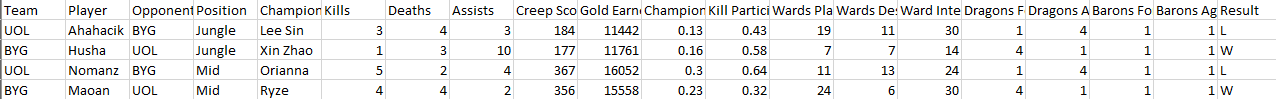

In [70]:
#Did not include Ward Int, Dragons Against, and Barons Against

In [69]:
sc_y.inverse_transform(regressor.predict(sc_X.transform([[4,3,184,11442,.13,.43,19,11,1,1]])).reshape(-1,1))

array([[0.90421902]])

In [71]:
sc_y.inverse_transform(regressor.predict(sc_X.transform([[3,10,177,11761,.16,.58,7,7,4,1]])).reshape(-1,1))

array([[3.93938801]])

In [72]:
sc_y.inverse_transform(regressor.predict(sc_X.transform([[2,4,367,16052,.3,.64,11,13,1,1]])).reshape(-1,1))

array([[5.11520941]])

In [73]:
sc_y.inverse_transform(regressor.predict(sc_X.transform([[4,2,356,15558,.23,.32,24,6,4,1]])).reshape(-1,1))

array([[2.71597959]])

# ModelPerformance

In [102]:
from sklearn.metrics import r2_score
print('R-Square',r2_score(y_test,y_pred))

R-Square 0.9343451180875576


In [78]:
from sklearn.metrics import mean_squared_error as msc
from math import sqrt
rms=sqrt(msc(y_test,y_pred))
print('The Mean Square error is', rms)

The Mean Square error is 1.509666251471904


# DTR

In [79]:
y_pred=regressor.predict(X_test)

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
regressor = LinearRegression()
regressor.fit(X,y)

LinearRegression()

In [81]:
regressor=DecisionTreeRegressor(random_state=0)
regressor.fit(X_train,y_train)

DecisionTreeRegressor(random_state=0)

In [82]:
y_pred=regressor.predict(X_test)

## Predicting Using DTR

In [85]:
regressor.predict([[4,3,184,11442,.13,.43,19,11,1,1]])

array([2.])

In [86]:
regressor.predict([[3,10,177,11761,.16,.58,7,7,4,1]])

array([2.])

In [87]:
regressor.predict([[2,4,367,16052,.3,.64,11,13,1,1]])

array([9.])

In [88]:
regressor.predict([[4,2,356,15558,.23,.32,24,6,4,1]])

array([3.])

## Model Performance

In [101]:
print('R-Square',r2_score(y_test,y_pred))

R-Square 0.9343451180875576


In [90]:
from sklearn.metrics import mean_squared_error as msc
from math import sqrt
rms=sqrt(msc(y_test,y_pred))
print('The Mean Square error is', rms)

The Mean Square error is 2.4824968676061645


# RFT

In [91]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
regressor = LinearRegression()
regressor.fit(X,y)

LinearRegression()

In [92]:
from sklearn.ensemble import RandomForestRegressor
regressor=RandomForestRegressor(n_estimators=20,random_state=0)
regressor.fit(X,y)

<ipython-input-92-40255d4da7b6>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(X,y)


RandomForestRegressor(n_estimators=20, random_state=0)

In [93]:
y_pred=regressor.predict(X_test)

# Predict using RFT

In [94]:
regressor.predict([[4,3,184,11442,.13,.43,19,11,1,1]])

array([1.65])

In [95]:
regressor.predict([[3,10,177,11761,.16,.58,7,7,4,1]])

array([3.55])

In [96]:
regressor.predict([[2,4,367,16052,.3,.64,11,13,1,1]])

array([5.65])

In [97]:
regressor.predict([[4,2,356,15558,.23,.32,24,6,4,1]])

array([4.5])

# Model Preformance

In [100]:
print('R-Square',r2_score(y_test,y_pred))

R-Square 0.9343451180875576


In [99]:
rms=sqrt(msc(y_test,y_pred))
print('The Mean Square error is', rms)

The Mean Square error is 0.7022389442944053


# Linear Regression

In [103]:
regressor = LinearRegression()
regressor.fit(X,y)

LinearRegression()

In [104]:
y_pred=regressor.predict(X_test)

# Predict Using LR

In [105]:
regressor.predict([[4,3,184,11442,.13,.43,19,11,1,1]])

array([[3.34131892]])

In [106]:
regressor.predict([[3,10,177,11761,.16,.58,7,7,4,1]])

array([[4.65506916]])

In [107]:
regressor.predict([[2,4,367,16052,.3,.64,11,13,1,1]])

array([[4.46400728]])

In [108]:
regressor.predict([[4,2,356,15558,.23,.32,24,6,4,1]])

array([[2.8872699]])

# Model Preformance

In [109]:
print('R-Square',r2_score(y_test,y_pred))

R-Square 0.8139916269438159


In [110]:
rms=sqrt(msc(y_test,y_pred))
print('The Mean Square error is', rms)

The Mean Square error is 1.1820004596173297
